<a href="https://colab.research.google.com/github/vic1030/Data_Science_Learning/blob/main/California%E5%86%B3%E7%AD%96%E6%A0%91%E5%AE%9E%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.48912683476170055


In [19]:
import pandas as pd
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)

# Display the first 5 rows and the first 5 columns
print(df.iloc[:, :5].head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population
0  8.3252      41.0  6.984127   1.023810       322.0
1  8.3014      21.0  6.238137   0.971880      2401.0
2  7.2574      52.0  8.288136   1.073446       496.0
3  5.6431      52.0  5.817352   1.073059       558.0
4  3.8462      52.0  6.281853   1.081081       565.0


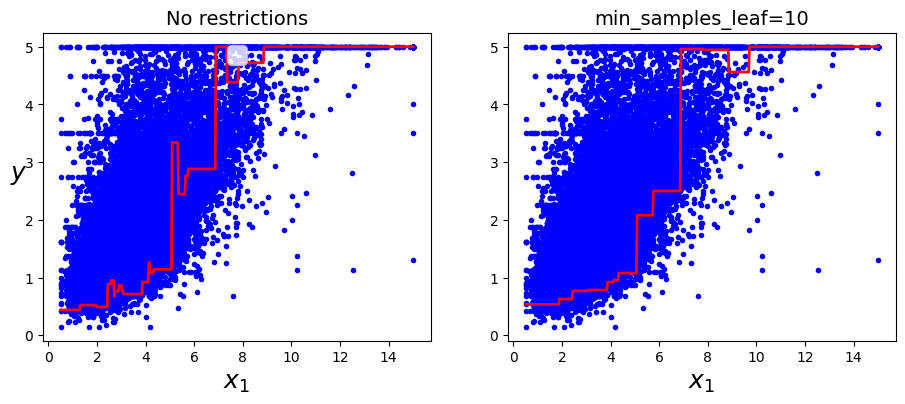

MSE without restrictions: 0.495235205629094
MSE with min_samples_leaf=10: 0.3638227372437009


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train DecisionTreeRegressor without restrictions
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X_train, y_train)
y_pred1 = tree_reg1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)

# Initialize and train DecisionTreeRegressor with min_samples_leaf=10
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, min_samples_split = 2, random_state=42, )
tree_reg2.fit(X_train, y_train)
y_pred2 = tree_reg2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)

# Create a new dataset for plotting
X_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 500).reshape(-1, 1)
X_plot_full = np.tile(X_train.mean(axis=0), (X_plot.shape[0], 1))
X_plot_full[:, 0] = X_plot.flatten()

y_plot_pred1 = tree_reg1.predict(X_plot_full)
y_plot_pred2 = tree_reg2.predict(X_plot_full)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X[:, 0], y, "b.")
plt.plot(X_plot, y_plot_pred1, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X[:, 0], y, "b.")
plt.plot(X_plot, y_plot_pred2, "r-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

print(f"MSE without restrictions: {mse1}")
print(f"MSE with min_samples_leaf=10: {mse2}")


In [34]:
#挑选合适的参数
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, min_samples_split = 2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 30],
}

# Initialize DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_tree_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_tree_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Test set mean squared error: {mse}")


Best parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test set mean squared error: 0.3638227372437009
